<a href="https://colab.research.google.com/github/luizribeiroti/Injury-NBA-data/blob/main/analisedados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_excel('/content/drive/MyDrive/CCARDBALANCE.xlsx')

In [64]:
df

,ID,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [65]:
#Transformando certas colunas com strings em num
mapeamento_casado = {
    "No": 0,
    "Yes": 1
}

df['Casado'] = df['Casado'].replace(mapeamento_casado)

In [66]:
mapeamento_sexo = {
    "Female": 0,
    " Male": 1
}

df['Sexo'] = df['Sexo'].replace(mapeamento_sexo)

In [67]:
mapeamento_etnia = {
    "Caucasian": 0,
    "African American": 1,
    "Asian": 2
}

df['Etnia'] = df['Etnia'].replace(mapeamento_etnia)

In [68]:
mapeamento_estudante = {
    "No": 0,
    "Yes": 1
}

df['Estudante'] = df['Estudante'].replace(mapeamento_estudante)

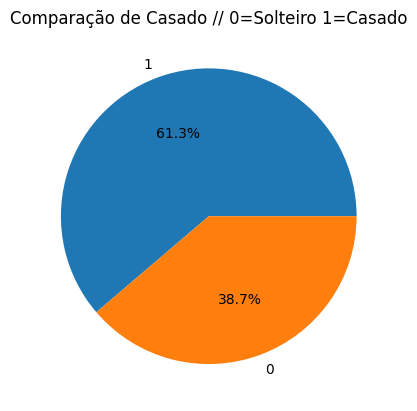

In [69]:
import matplotlib.pyplot as plt

frequencia = df['Casado'].value_counts()

plt.pie(frequencia, labels=frequencia.index, autopct='%1.1f%%')

plt.title('Comparação de Casado // 0=Solteiro 1=Casado')

plt.show()
#Com essa análise podemos ver que a maior parte dos nossos clientes são casados.

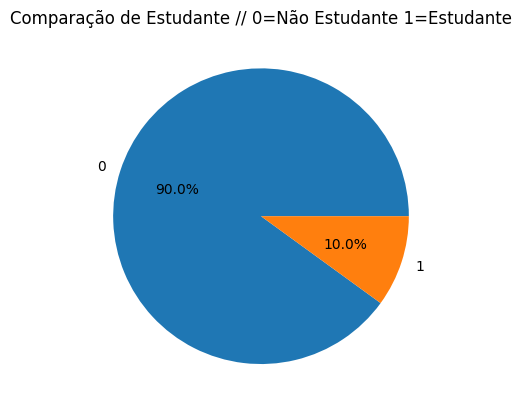

In [71]:
frequencia = df['Estudante'].value_counts()

plt.pie(frequencia, labels=frequencia.index, autopct='%1.1f%%')

plt.title('Comparação de Estudante // 0=Não Estudante 1=Estudante')

plt.show()
#Com essa análise podemos ver que 90% dos nossos clientes não estudam.

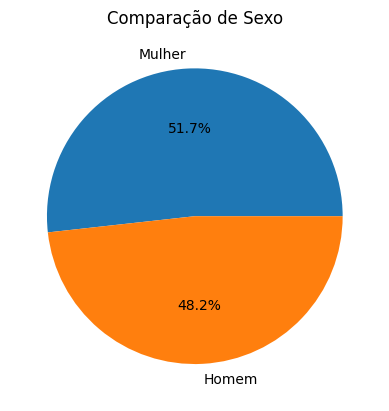

In [72]:
mapeamento_sexo = {
    0: 'Mulher',
    1: 'Homem',
}

homem_ou_mulher = df['Sexo'].map(mapeamento_sexo).value_counts()

plt.pie(homem_ou_mulher, labels=homem_ou_mulher.index, autopct='%1.1f%%')

plt.title('Comparação de Sexo')

plt.show()
#Com essa análise podemos ver que nossos clientes são maioria mulheres porém com uma diferença de apenas 1,7% para os homens

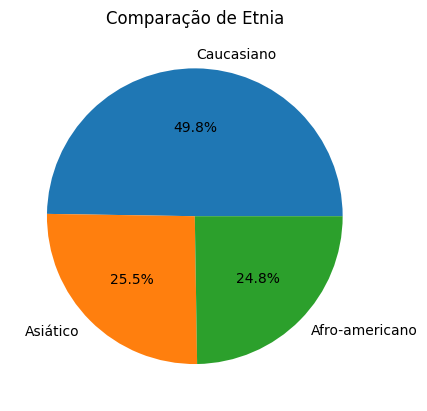

In [73]:
mapeamento_etnia = {
    0: 'Caucasiano',
    1: 'Afro-americano',
    2: 'Asiático'
}

frequencia_etnia = df['Etnia'].map(mapeamento_etnia).value_counts()

plt.pie(frequencia_etnia, labels=frequencia_etnia.index, autopct='%1.1f%%')

plt.title('Comparação de Etnia')

plt.show()
#A maior parte dos nosso clientes são caucasianos, mas não acredito que seja um diferencial

In [74]:
media_idade = df['Idade'].mean()
minimo_idade = df['Idade'].min()
maximo_idade = df['Idade'].max()

print("Média:", media_idade)
print("Mínimo:", minimo_idade)
print("Máximo:", maximo_idade)
#Nosso público atingido tem média de 55/56 anos, com mínimo de 23 e máximo de 98 anos de idade.

Média: 55.6675
Mínimo: 23
Máximo: 98


In [75]:
media_educacao = df['Educacao'].mean()
minimo_educacao = df['Educacao'].min()
maximo_educacao = df['Educacao'].max()

print("Média:", media_educacao)
print("Mínimo:", minimo_educacao)
print("Máximo:", maximo_educacao)
#Nosso público atingido tem média de 13/14 anos de educação, com mínimo de 5 e 20 de máximo.

Média: 13.45
Mínimo: 5
Máximo: 20


In [76]:
minimo_rating = df['Rating'].min()
maximo_rating = df['Rating'].max()
print(minimo_rating)
print(maximo_rating)
#Ratings de 93 á 982, acredito que seja a coluna que mais da pra se tirar informação, comparando com outras colunas.

93
982


In [77]:
media_renda_por_rating = df.groupby('Rating')['Renda'].mean()

print(media_renda_por_rating)
#Temos uma base de que normalmente quem possui uma maior renda possui um maior rating.

Rating
93      15.717
103     15.602
112     13.433
115     16.819
117     11.808
        ...   
817    140.672
828    152.298
832    180.682
949    186.634
982    182.728
Name: Renda, Length: 283, dtype: float64


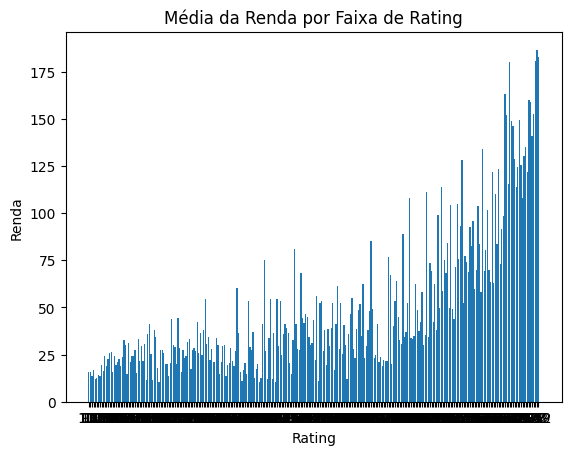

In [78]:
plt.bar(media_renda_por_rating.index.astype(str), media_renda_por_rating)
plt.xlabel('Rating')
plt.ylabel('Renda')
plt.title('Média da Renda por Faixa de Rating')
plt.show()
#Plotando gráficos conseguimos ver que a tendencia quando o cliente possui maior Renda ele possui um Rating maior.

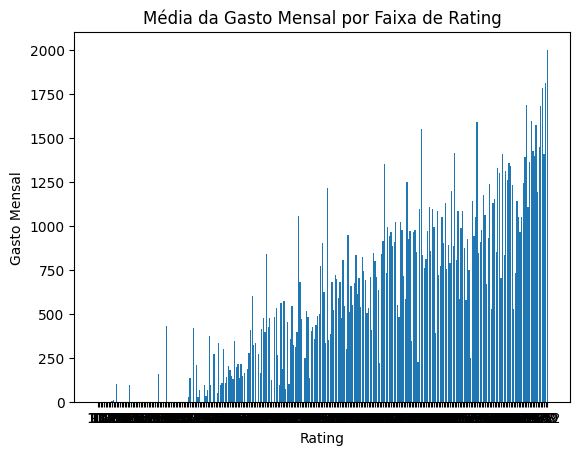

In [79]:
media_gasto_por_rating = df.groupby('Rating')['Gasto Mensal'].mean()
plt.bar(media_gasto_por_rating.index.astype(str), media_gasto_por_rating)
plt.xlabel('Rating')
plt.ylabel('Gasto Mensal')
plt.title('Média da Gasto Mensal por Faixa de Rating')
plt.show()
#Vemos também que quem possui um gasto mensal maior, possui um rating maior, logo quem é mais gastador geralmente paga no final do mês.

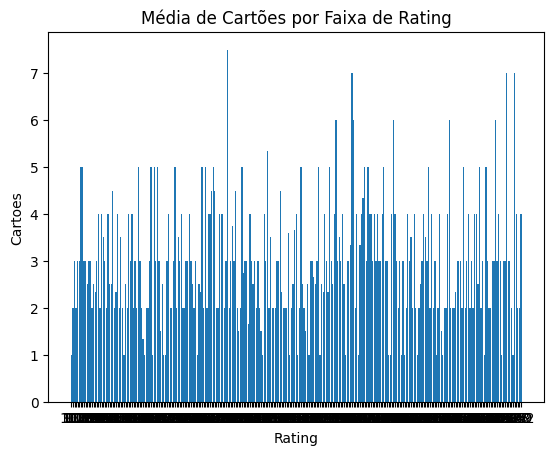

In [80]:
media_cartoes_por_rating = df.groupby('Rating')['Cartoes'].mean()
plt.bar(media_cartoes_por_rating.index.astype(str), media_cartoes_por_rating)
plt.xlabel('Rating')
plt.ylabel('Cartoes')
plt.title('Média de Cartões por Faixa de Rating')
plt.show()
#Essa análise foi em vão, tendo em vista que não é um diferencial para o rating do cliente o numero de cartões que ele possui.

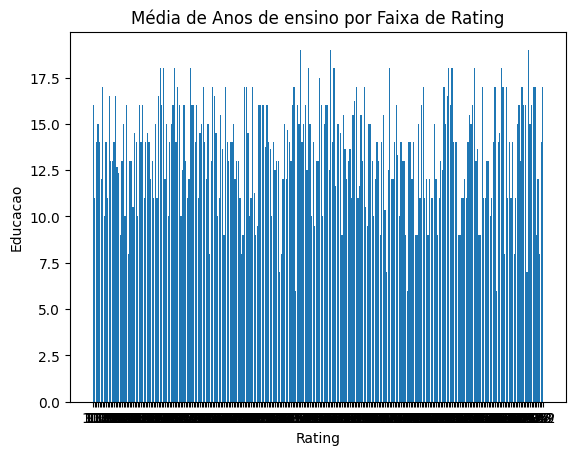

In [81]:
media_estudo_por_rating = df.groupby('Rating')['Educacao'].mean()
plt.bar(media_estudo_por_rating.index.astype(str), media_estudo_por_rating)
plt.xlabel('Rating')
plt.ylabel('Educacao')
plt.title('Média de Anos de ensino por Faixa de Rating')
plt.show()
#Essa análise foi em vão, tendo em vista que não é um diferencial para o rating do cliente o número de anos de estudo.

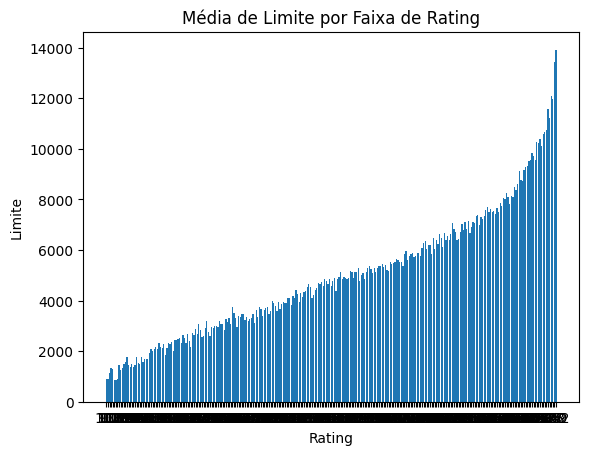

In [82]:
media_limite_por_rating = df.groupby('Rating')['Limite'].mean()
plt.bar(media_limite_por_rating.index.astype(str), media_limite_por_rating)
plt.xlabel('Rating')
plt.ylabel('Limite')
plt.title('Média de Limite por Faixa de Rating')
plt.show()
#Tendo em vista o gráfico abaixo, quanto maior o limite do cliente maior o Rating dele

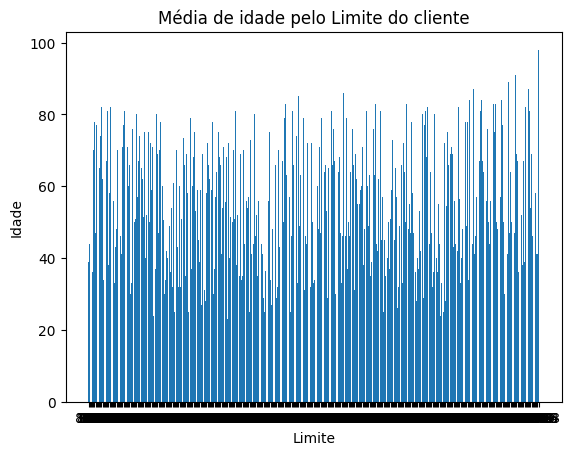

In [83]:
media_idade_por_limite = df.groupby('Limite')['Idade'].mean()
plt.bar(media_idade_por_limite.index.astype(str), media_idade_por_limite)
plt.xlabel('Limite')
plt.ylabel('Idade')
plt.title('Média de idade pelo Limite do cliente')
plt.show()
#Podemos ver que a idade não influencia no limite do cliente normalmente.

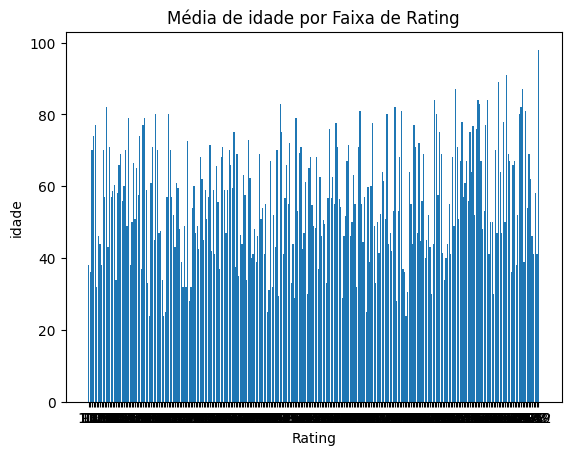

In [84]:
media_idade_por_rating = df.groupby('Rating')['Idade'].mean()
plt.bar(media_idade_por_rating.index.astype(str), media_idade_por_rating)
plt.xlabel('Rating')
plt.ylabel('idade')
plt.title('Média de idade por Faixa de Rating')
plt.show()
#Tendo em vista o gráfico abaixo, quanto maior o limite do cliente maior o Rating dele

**TENDO EM VISTA OS PONTOS QUE ANALISEI A CIMA NOSSO CLIENTE IDEAL SERIA O**: CASADO, ATUALMENTE NÃO ESTUDANTE, COM MAIOR ÍNDICE DE GASTO MENSAL, COM MAIOR RENDA e MAIOR LIMITE.

**DIFERENCIAL/PONTOS EXTRAS**: CAUCASIANOS e MULHERES.

**PONTOS INDIFERENTES**: NUMERO DE CARTÕES POSSUIDOS, ANOS DE ENSINO e IDADE.